# Recurrent Neural Networks (RNNs)

In [ ]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
## Importing the dataset
df = pd.read_csv("TESLA.csv")

In [ ]:
## Selecting the 'Close' price for prediction
df = df[['Close']]


In [ ]:
## Applying Min-Max Normalization for Time Series Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)


In [ ]:
## Splitting Training and Testing Data
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]


In [ ]:
## Building X_train and y_train Arrays for LSTM Forecasting
X_train, y_train = [], []
for i in range(60, len(train_data)):  # Using past 60 days to predict next
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
## Create RNN Architecture
model = Sequential()


In [ ]:
## Adding First LSTM Layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout Regularization
model.add(LSTM(units=50, return_sequences=False))  # Second LSTM layer
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer predicting next day's price


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
## Compile RNN
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
## Train the Model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 1.7666e-04
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 1.3908e-05
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 1.3376e-05
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 1.1952e-05
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 1.1543e-05
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 9.1388e-06
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 1.1711e-05
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 8.3569e-06
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 6.7603e-06
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 8.0189e-06
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 7.3295e-06
Epoch 12/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 7.7701e-06
Epoch 13/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 8.4954e-06
Epoch 14/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 7.3178e-06
Epoch 15/50
72/

In [ ]:
## Preparing Historical Stock Data: Scaling and Reshaping
X_test, y_test = [], []
test_inputs = train_data[-60:].tolist() + test_data.tolist()

for i in range(60, len(test_inputs)):
    X_test.append(test_inputs[i-60:i])
    y_test.append(test_inputs[i])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
## Predicting Stock Prices
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)  # Reverse scaling


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


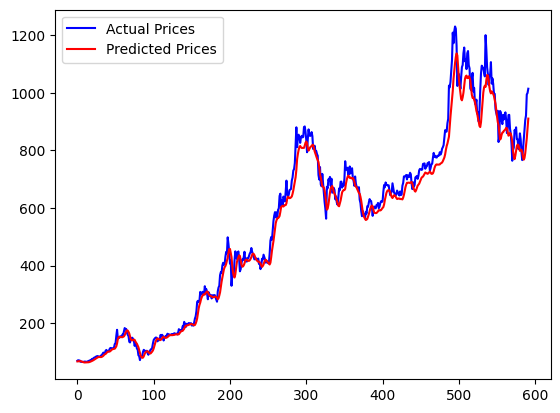

In [ ]:

## Visualizing LSTM Predictions
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predicted_stock_price, color='red', label='Predicted Prices')
plt.legend()
plt.show()
